**Student name and BC username**


**Collaborators names and BC usernames (max 2 collaborators)**


# <font face = "times"><center>  EC1151 - Homework 11 - Due Dec 2nd, Midnight</font> 

<font face="times">
# Instructions
<br>

+ You must fill out this Jupyter notebook and return it by e-mail to baisihad@bc.edu

+ Double click on the cells to edit them

+ For questions that need mathematical notation, try to use $\LaTeX$ if you can.

+ Sometimes, below a question that requires an answer there will be a cell with several `assert` statements. If you can run that cell without generating error, your answer has been validated and you are guaranteed the points.

+ If you're stuck, try posting a question in the Piazza forum. Active contributors will be rewarded.

+ Finally, this is <b>experimental</b>. I'd love to hear what you think about this homework format. You can e-mail me with your thoughts, or (preferrably) post in the Piazza forum (possibly anonymously to your peers).

<font face="times">

<font size=3>This homework is graded out of <font color="purple"><b>100</b></font> points.

---

I'll import all the libraries you may need ahead. (<font color="red">Run the cell below!</font>)

In [2]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

---

## Law of Iterated Expectations

**Q1)** Prove the following statements mathematically. Then, write a short sentence explaining the result. If you want, you may provide an example for illustration.

a) For any random variable $Z$, if $E[Z|X = x] = 0$ for every $x$,  then  $E[Z] = 0$

b) If $\epsilon = Y - E[Y|X = x]$, then $E[\epsilon | X = x] = 0$.

c) If $\epsilon = Y - E[Y|X=x]$, then $Cov[\epsilon, X] = 0$

d) If $Y$ and $X$ are independent, then $E[Y|X] = E[Y]$.

e) If $X$ and $Y$ are independent, then $E[XY] = E[X]E[Y]$

---

## Yet more conditional expectations, once again.

**Q2)** Let's denote by $X_1$ and $X_2$ be the outcome of two independence dice rolls. Also, let $Y = X_1 + X_2$ and $U = \min\{X_1, X_2\}$.

a) Find $E[Y|X_1 = 2]$. (Your answer should be a number)

b) Find $E[Y|X_1 = x_1]$. (Your answer should be in terms of $x_1$)

c) Find $E[X_1 | U = 6]$ (Your answer should be a number)

d) Find $E[X_1 | U \geq 3]$ (Your answer should be a number)

e) Find $E[U | X_1 \geq 3]$ (Your answer should be a number)

f) Find $E[U | X_1 \geq x_1]$ (Your answer should be in terms of $x_1$)

---

**Q3)** Let $X$ be some random variable, and let $Y \sim Normal(0, X^2)$.

a) What is $E[Y]$?

b) What is $E[Y|X=x]$?

c) What is $Var[Y|X=x]$?

d) Let's check what this looks like. For simplicity, let's make $X \sim Uniform[-10,10]$.

The code below does the following:

+ Draws 1000 numbers from $Uniform[-10, 10]$ and stores them in an array `X`

+ For each outcome `X`, draws once from $Normal(0,X^2)$, then stores all outcomes in an array `Y`.

<b>Before</b> uncommenting the code below, take a moment to consider what an scatterplot of $X$-$Y$ should look like.

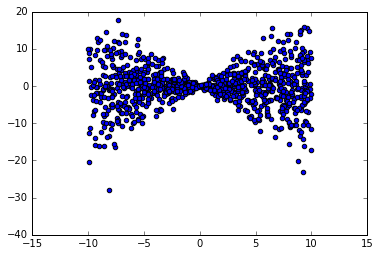

In [9]:
X = ss.uniform(-10, 20).rvs(1000) # Generates Uniform[-10, -10+20] = Uniform[-10, 10]
Y = ss.norm(0, np.sqrt(X**2)).rvs()  # Generates Y|X ~ Normal(0, X**2)
fig, ax = plt.subplots(1)
ax.scatter(X, Y)

(array([   1.,    1.,   10.,   48.,  130.,  488.,  218.,   66.,   27.,   11.]),
 array([-28.26196257, -23.29135615, -18.32074974, -13.35014332,
         -8.3795369 ,  -3.40893049,   1.56167593,   6.53228235,
         11.50288877,  16.47349518,  21.4441016 ]),
 <a list of 10 Patch objects>)

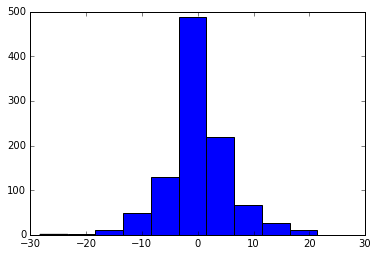

In [6]:
plt.hist(Y)

[Open ended] Did the scatterplot look like you were expecting? Why or why not?

----

**Q4)** Let $X \sim Uniform[1, 5]$, and let $Y \sim Normal(2 + 3X, \ X^2)$.

a) Find $E[Y|X = 1]$ (Your answer should be a number)

b) Find $Var[Y|X=1]$ (Your answer should be a number).

c) Find $E[Y|X = x]$ (Your answer should be in terms of $x$).

d) Find $E[Y]$ using your answer to parts `c` and `a`.

e) Let's visually check what this looks like. 

The code below does the following:

+ Draws 1000 numbers from $Uniform[1, 5]$ and stores them in an array `X`

+ For each outcome `X`, draws once from $Normal(2 + 3X,\ X^2)$, then stores all outcomes in an array `Y`.

<b>Before</b> uncommenting the code below, take a moment to consider what an scatterplot of $X$-$Y$ should look like.

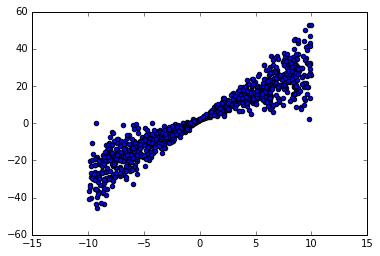

In [13]:
X = ss.uniform(-10, 20).rvs(1000) # Generates Uniform[1, 1+4] = Uniform[1, 5]
Y = ss.norm(2 + 3*X, np.sqrt(X**2)).rvs()  # Generates Y|X ~ Normal(2 + 3X, X**2)
fig, ax = plt.subplots(1)
ax.scatter(X, Y)

e ) [Open ended] Did the scatterplot look like you were expecting? Why or why not?


---

# Interpreting regression results

**Q5)**  Suppose that you are interested in estimating the relationship between freshmen `undergraduate GPA` ($Y$) and class `attendance` ($X_1$), in hours. You also have data on three other variables: `High School GPA` ($X_2$) and `SAT score` ($X_3$). 

a) Suppose that you assume that the conditional expectation of $Y$ given $X_1$ is linear

$$E[Y \ | \ X_1 = x_1] = b_0 + b_1 X_1$$

When we run this regression, would you expect your estimate of the slope, $\hat{b}_1$, to be positive or negative?

b) Suppose you ran the regression and your estimate is $\hat{b}_1 = .01$. Does that mean that one extra hour in class <u>causes</u>  a freshman's GPA to increase by $0.01$ points, on average? Explain.

c) If you also included `High School GPA` $X_2$ and `SAT score` $X_3$ in your regression, as in 

$$E[Y \ | \ X_1 = x_1, \ X_2 = x_2, \ X_3 = x_3] \ = \ b_0 + b_1 X_1 + b_2 X_2 + b_3 X_3$$

how do you think your estimates of $\hat{b}_1$ would change? What are you *controlling for* by including $X_2$ and $X_3$? 

d) [Open ended] Do you think after controlling for `SAT score` and `High School GPA` we can say that $\hat{b}_1$ gives us the *causal effect* of `class attendance` on `GPA`? Why or why not? If not, what else would you change? (Your answer may criticize both the functional form and the selection of variables).